In [12]:
import os
from pathlib import Path
import cv2
import pandas as pd

ROOT = Path(os.getcwd()).parents[0]

ROOT

PosixPath('/Users/dantrainer/projects/live-bib-tracking')

In [13]:
FRAME_DIR = os.path.join(ROOT, "data", "processed", "frames") 

In [23]:
import json

for dirpath, dirnames, filenames in os.walk(FRAME_DIR):
    records = []
    for file_ in filenames:
        if not file_.endswith('.json'):
            continue 
        
        with open(os.path.join(dirpath, file_), 'r') as f:
            data = json.load(f)
        
        # Extract shape info
        for shape in data['shapes']:
            label = shape['label']
            x1, y1 = shape['points'][0]
            x2, y2 = shape['points'][1]
            image_path = data['imagePath']

            records.append({
                'image': image_path,
                'label': label,
                'x1': x1,
                'y1': y1,
                'x2': x2,
                'y2': y2
            })

df_annotations = pd.DataFrame(records)

<Axes: >

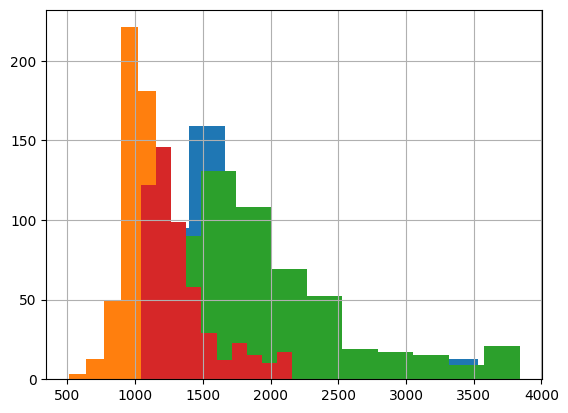

In [28]:
df_annotations['x1'].hist()
df_annotations['y1'].hist()
df_annotations['x2'].hist()
df_annotations['y2'].hist()

TODOs:
- Modeling/Preprocessing
    - pre-processing code to crop image to important part of the finish line (to avoid noise)
    - augment data with open source data of bibs
    - evaluate OCR methods on ground truth bounding boxes (tesseract, easyocr, rekognition?)
 